In [19]:
import scipy as sp
import numpy as np
#import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def FHNneuron(Iext,time,point):
    #parameters
    #would be nice to explain what each param means
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08*3 #1/tau
    
    #might want t to be variable?
    #t = sp.arange(0.0, 450.0, 0.01)
    t=time
    
    def dALLdt(X, t):
        """
        Integrate

        |  :param X:
        |  :param t:
        |  :return: calculate membrane potential & activation variables
        """
        
        v, w = X
        
        dvdt = c*(v - v**3 - w + R*Iext)
        dwdt = (tauinv/c)*(v + a - b*w)
        
        return dvdt, dwdt
    
    X = odeint(dALLdt, point, t)#need initial guesses for v and w
    #v = X[:,0]
    #w = X[:,1]
    
    return X

    

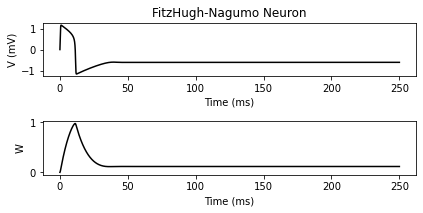

In [20]:
I=0.5;
t=np.arange(0.0, 250.0, 0.01)
neuron1=FHNneuron(I,t,[0,0]);
v=neuron1[:,0];
w=neuron1[:,1];

plt.figure()

plt.subplot(3,1,1)
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)
plt.plot(t, w, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('W')

#plt.subplot(3,1,3)
#plt.plot(v, w, 'k')
#plt.ylabel('phase plot')
plt.tight_layout()

plt.show()    

    
    
    
    

Text(0, 0.5, 'W')

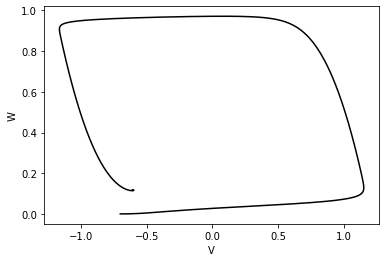

In [21]:
I=0.5;
t=np.arange(0.0, 250.0, 0.01)
neuron1=FHNneuron(I,t,[-0.7,0]);
v=neuron1[:,0];
w=neuron1[:,1];

plt.figure()
#plt.title('FitzHugh-Nagumo Neuron')
plt.plot(v, w, 'k')
plt.xlabel('V')
plt.ylabel('W')


Text(0, 0.5, 'W')

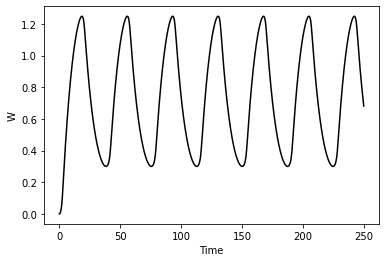

In [4]:
I=0.75;
t=np.arange(0.0, 250.0, 0.01)
neuron1=FHNneuron(I,t,[-0.7,0]);
v=neuron1[:,0];
w=neuron1[:,1];

plt.figure()
#plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, w, 'k')
plt.xlabel('Time')
plt.ylabel('W')

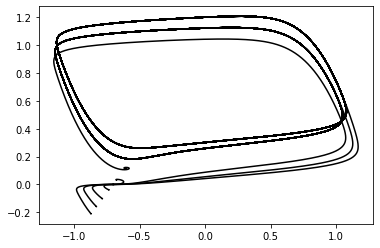

In [5]:
vlist=[];
wlist=[];
Ivec=np.arange(0,0.75,0.1);
t=np.arange(0.0, 750.0, 0.01);
#tstop=int(len(t)/12);
tstop=int(len(t))

for I in Ivec:
    neuron=FHNneuron(I,t,[-0.7,0]);
    v=neuron[0:tstop,0];
    w=neuron[0:tstop,1];
    
    plt.plot(v, w, 'k')
    plt.plot()
    
    #vlist.append(v);
    #wlist.append(w);
    


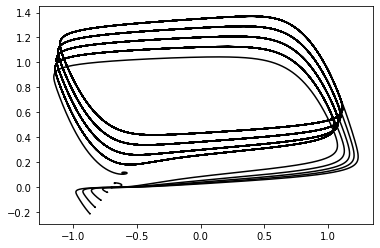

In [6]:
vlist=[];
wlist=[];
Ivec=np.arange(0,1,0.1);
t=np.arange(0.0, 450.0, 0.01)
#tstop=int(len(t)/12);
tstop=int(len(t))

for I in Ivec:
    neuron=FHNneuron(I,t,[-0.7,0]);
    v=neuron[:,0];
    w=neuron[:,1];
    
    plt.plot(v, w, 'k')
    plt.plot()
    
    #vlist.append(v);
    #wlist.append(w);
    


(-0.5, 2.0)

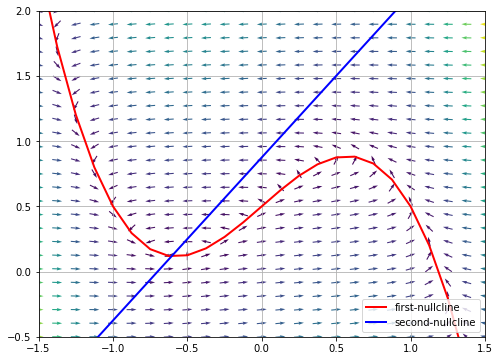

In [14]:
def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - v**3 - w + R*Iext
    dwdt = (tauinv)*(v + a - b*w)
        
    return dvdt, dwdt
a=0.7;
b=0.8;
c=3;
    
#these two params from scholarpedia, would like better justification
R=1;
tauinv=0.08*3; #1/tau


#for this, pick Iext
Iext=0.5;

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.quiver(V1, W1, DV1, DW1, M, pivot='mid')
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

(-0.5, 2.0)

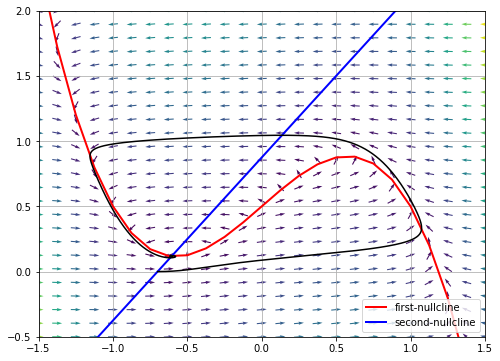

In [8]:
#for this, pick Iext
Iext=0.5;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.quiver(V1, W1, DV1, DW1, M, pivot='mid')
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

(-0.5, 2.0)

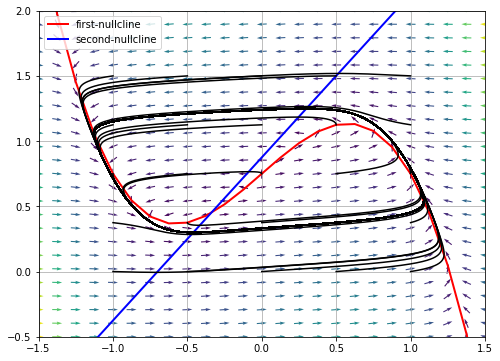

In [9]:
#for this, pick Iext
Iext=0.75;
t=np.arange(0.0, 750.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

vinits=np.linspace(-1,1,5)
winits=np.linspace(0,1.5,5)
for wi in winits:
    for vi in vinits:
        neuron=FHNneuron(Iext,t,[vi,wi]);
        va=neuron[:,0];
        wa=neuron[:,1];
        ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.quiver(V1, W1, DV1, DW1, M, pivot='mid')
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

(-0.5, 2.0)

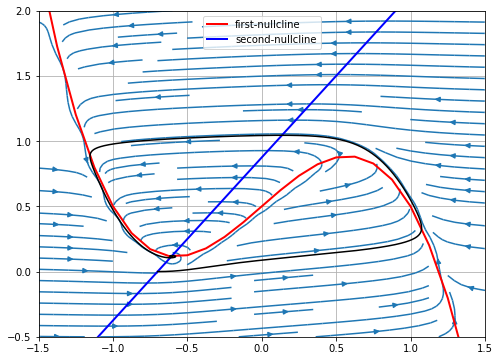

In [10]:
#for this, pick Iext
Iext=0.5;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

No handles with labels found to put in legend.


Text(0, 0.5, 'W')

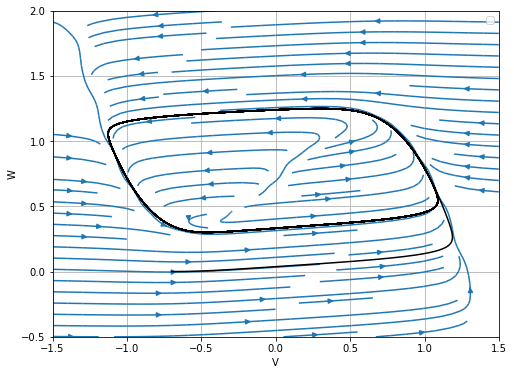

In [11]:
#for this, pick Iext
Iext=0.75;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

#ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
#ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)
plt.xlabel('V')
plt.ylabel('W')

(-0.5, 2.0)

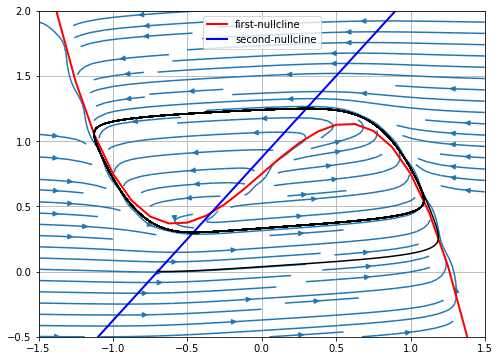

In [12]:
#for this, pick Iext
Iext=0.75;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron(Iext,t,[-0.7,0]);
va=neuron[:,0];
wa=neuron[:,1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)